In [1]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

  Activating project at `~/Documents/GitHub/Imbalance.jl/examples`


### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

type="ColTable"
num_rows = 500
num_features = 5
probs = [0.5, 0.2, 0.3]
y_ind = 6

Xy, _ = generate_imbalanced_data(num_rows, num_features; probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features; probs, type, rng=42)

((Column1 = [0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9522580699968279, 0.06304475092339623, 0.18909001622655808, 0.19934942931986965  …  0.01308976221980429, 0.48597926808091163, 0.20768781798463476, 0.30045611276046247, 0.15759293576302558, 0.975806377881983, 0.9051229227439054, 0.20093453902288716, 0.5174934859434619, 0.8203123729325034], Column2 = [0.3352373395961351, 0.49460036744921987, 0.4347054944366465, 0.12349582212985799, 0.2822548977791124, 0.3945315612585285, 0.8518485322670982, 0.1666573133170064, 0.1505275355229858, 0.7653596029260221  …  0.49257116506724075, 0.9123822174057593, 0.881923415842637, 0.618769638450712, 0.8954779640813053, 0.12203656948721786, 0.3135980161274603, 0.9766504088749931, 0.17486766511303098, 0.8059197855104023], Column3 = [0.322880331626361, 0.9974614873018822, 0.02988526946604697, 0.6701196021335406, 0.908660778257362, 0.7061461470381345, 0.5873767114408275, 0.19

### 2. Apply BorderlineSMOTE1

#### Using Imbalance Only

In [3]:
Xover, yover = borderline_smote1(X, y; m = 4, k = 5, ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

┌ Info: The mapping from each class to number of borderline points is (0 => 177, 2 => 111, 1 => 46). Only these points will be oversampled.
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/oversampling_methods/borderline_smote1/borderline_smote1.jl:221


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:00



Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  class:  2


((Column1 = [0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9522580699968279, 0.06304475092339623, 0.18909001622655808, 0.19934942931986965  …  0.6447940468788147, 0.3538340926170349, 0.7035710215568542, 0.44527411460876465, 0.3638652563095093, 0.8051443099975586, 0.8110321760177612, 0.741798460483551, 0.9289118647575378, 0.9727912545204163], Column2 = [0.3352373395961351, 0.49460036744921987, 0.4347054944366465, 0.12349582212985799, 0.2822548977791124, 0.3945315612585285, 0.8518485322670982, 0.1666573133170064, 0.1505275355229858, 0.7653596029260221  …  0.149217888712883, 0.17859512567520142, 0.6999332904815674, 0.4127123951911926, 0.43581825494766235, 0.7125250101089478, 0.8397209644317627, 0.7099055647850037, 0.46121472120285034, 0.1304709017276764], Column3 = [0.322880331626361, 0.9974614873018822, 0.02988526946604697, 0.6701196021335406, 0.908660778257362, 0.7061461470381345, 0.5873767114408275, 0.194967

#### Using MLJ

In [4]:
smote_model = Imbalance.MLJ.BorderlineSMOTE1(m=4, k=5, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(smote_model)
Xover, yover = transform(mach, X, y)

┌ Info: The mapping from each class to number of borderline points is (0 => 177, 2 => 111, 1 => 46). Only these points will be oversampled.
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/oversampling_methods/borderline_smote1/borderline_smote1.jl:221


((Column1 = [0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9522580699968279, 0.06304475092339623, 0.18909001622655808, 0.19934942931986965  …  0.6447940468788147, 0.3538340926170349, 0.7035710215568542, 0.44527411460876465, 0.3638652563095093, 0.8051443099975586, 0.8110321760177612, 0.741798460483551, 0.9289118647575378, 0.9727912545204163], Column2 = [0.3352373395961351, 0.49460036744921987, 0.4347054944366465, 0.12349582212985799, 0.2822548977791124, 0.3945315612585285, 0.8518485322670982, 0.1666573133170064, 0.1505275355229858, 0.7653596029260221  …  0.149217888712883, 0.17859512567520142, 0.6999332904815674, 0.4127123951911926, 0.43581825494766235, 0.7125250101089478, 0.8397209644317627, 0.7099055647850037, 0.46121472120285034, 0.1304709017276764], Column3 = [0.322880331626361, 0.9974614873018822, 0.02988526946604697, 0.6701196021335406, 0.908660778257362, 0.7061461470381345, 0.5873767114408275, 0.194967

#### Using TableTransforms

In [5]:
using Imbalance: TableTransforms.BorderlineSMOTE1
smote_model_t = BorderlineSMOTE1(y_ind, m=4, k=5, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
Xyover = Xy |> smote_model_t

┌ Info: The mapping from each class to number of borderline points is (0.0 => 177, 2.0 => 111, 1.0 => 46). Only these points will be oversampled.
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/oversampling_methods/borderline_smote1/borderline_smote1.jl:221


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:00



Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  class:  2.0


(Column1 = [0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9522580699968279, 0.06304475092339623, 0.18909001622655808, 0.19934942931986965  …  0.6447940468788147, 0.3538340926170349, 0.7035710215568542, 0.44527411460876465, 0.3638652563095093, 0.8051443099975586, 0.8110321760177612, 0.741798460483551, 0.9289118647575378, 0.9727912545204163],
 Column2 = [0.3352373395961351, 0.49460036744921987, 0.4347054944366465, 0.12349582212985799, 0.2822548977791124, 0.3945315612585285, 0.8518485322670982, 0.1666573133170064, 0.1505275355229858, 0.7653596029260221  …  0.149217888712883, 0.17859512567520142, 0.6999332904815674, 0.4127123951911926, 0.43581825494766235, 0.7125250101089478, 0.8397209644317627, 0.7099055647850037, 0.46121472120285034, 0.1304709017276764],
 Column3 = [0.322880331626361, 0.9974614873018822, 0.02988526946604697, 0.6701196021335406, 0.908660778257362, 0.7061461470381345, 0.5873767114408275, 0.19496

### 3. Plot the Results

    Updating registry at `~/.julia/registries/General`


    Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Manifest.toml`


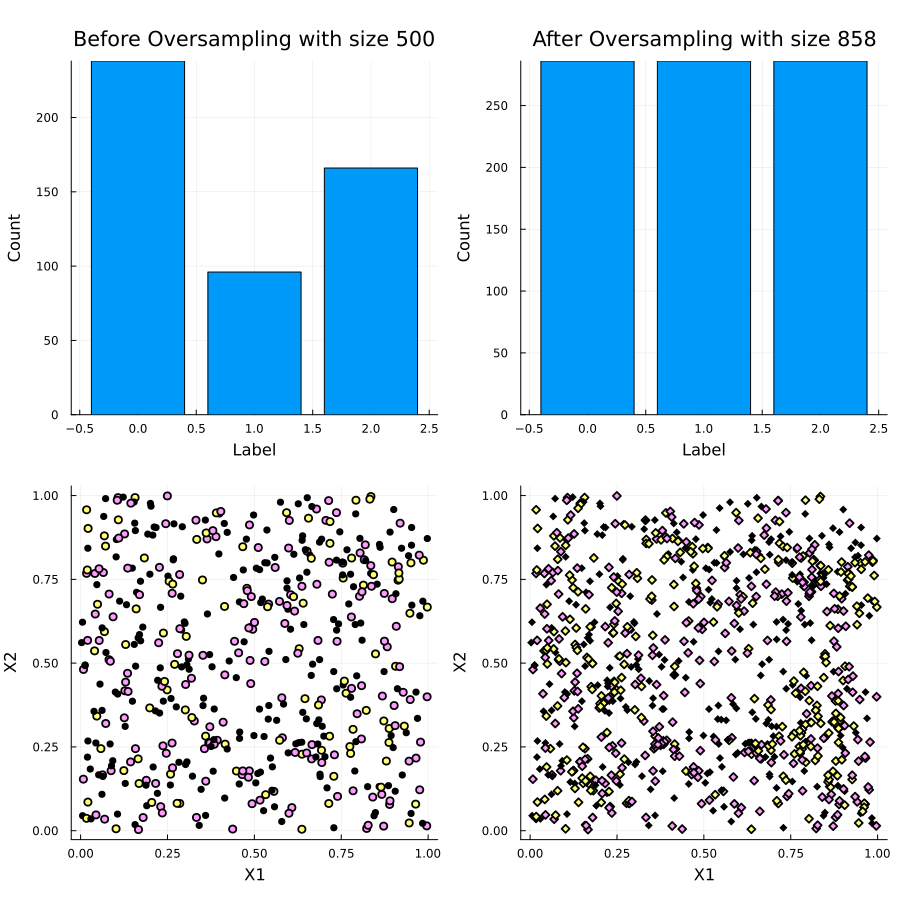

In [6]:
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, yover, X, Xover)